# Explore here

In [6]:
# Your code here
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Eliminamos las otras columnas ya que no nos intersan, nos quedamos solo con estas tres para realizar el ejercicio.
df = df[["Latitude", "Longitude", "MedInc"]]
print(df)

       Latitude  Longitude  MedInc
0         37.88    -122.23  8.3252
1         37.86    -122.22  8.3014
2         37.85    -122.24  7.2574
3         37.85    -122.25  5.6431
4         37.85    -122.25  3.8462
...         ...        ...     ...
20635     39.48    -121.09  1.5603
20636     39.49    -121.21  2.5568
20637     39.43    -121.22  1.7000
20638     39.43    -121.32  1.8672
20639     39.37    -121.24  2.3886

[20640 rows x 3 columns]


In [9]:
df.duplicated().sum()

np.int64(5)

In [10]:
df.drop_duplicates()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [11]:
df.isnull().sum()

Latitude     0
Longitude    0
MedInc       0
dtype: int64

In [ ]:
# Dividimos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

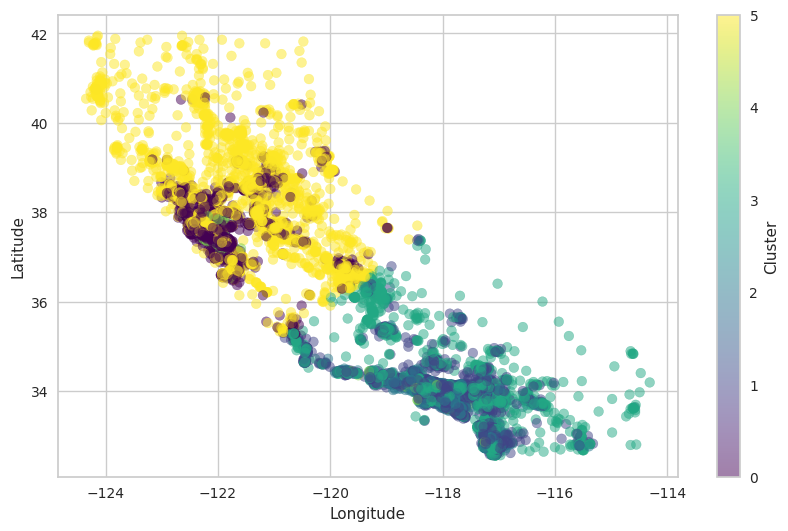

In [ ]:
# Aplicamos K-Means con 6 clusters como dice el ejercicio
kmeans = KMeans(n_clusters=6, random_state=42, n_init="auto")
kmeans.fit(train_data)
train_data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


Si el clustering también está influenciado por la variable de ingresos medios MedInc, es probable que los clusters reflejen diferencias en el costo de vida o el nivel socioeconómico de cada área.
Se nota una gran concentración de un cluster en amarillo en el norte de California, lo que sugiere que muchas zonas tienen características similares allí.

In [22]:
train_data.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

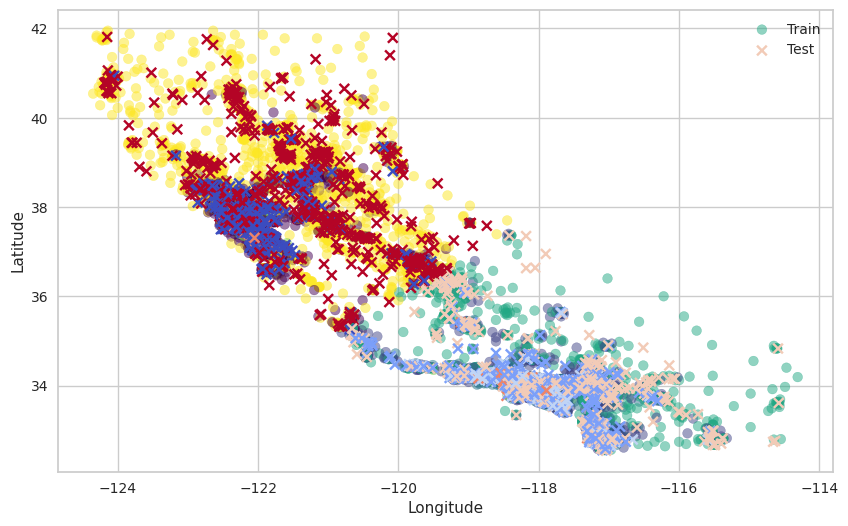

In [ ]:
# Predecimos con el conjunto de test con .predict
test_clusters = kmeans.predict(test_data)
test_data['cluster'] = test_clusters

plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='coolwarm', marker='x', label='Test')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Los puntos de prueba parecen seguir un patrón similar a los de entrenamiento, lo que indica que los clusters obtenidos generalizan bien sobre los datos nuevos.
Se nota que los clusters en el conjunto de prueba test set están asignados de manera coherente con los del conjunto de entrenamiento.
Sin embargo, algunas áreas, especialmente en el norte de California zona amarilla y marrón, presentan una gran cantidad de puntos de prueba que se mezclan con varios clusters, lo que podría indicar zonas de mayor variabilidad.
En este gráfico, parece que la segmentación sigue patrones espaciales claros, lo que sugiere que el modelo captura diferencias en los datos de manera efectiva.

In [ ]:
# Entrenamos un modelo supervisado
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
# Evaluamos el modelo
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



El modelo supervisado ha replicado perfectamente el clustering de K-Means, lo que sugiere que las características elegidas son suficientes para definir grupos de datos de manera robusta.
El modelo clasifica correctamente casi todos los puntos de prueba.
F1 con valores entre 0.98 y 1.00, lo que indica un excelente equilibrio entre precisión y recall.
El cluster 4 tiene el rendimiento más bajo 0.97 de recall y 0.98 de precisión, esto podría deberse a que tiene menos muestras support = 62, lo que puede generar un menor aprendizaje del modelo para esta categoría.